# Data 620 Assignment: Week 3 Part 2

Jithendra Seneviratne, Sheryl Piechocki 

June 19, 2020

In [1]:
%matplotlib inline
import pandas as pd
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
init_notebook_mode(connected=True)

### Youtube video
[Video link](https://youtu.be/5_djzzmwkQA)

#### Data: Davis Southern Club Women

The data was collected by Davis et al. in the 1930s. It consists of 18 Southern women and their attendance at 14 clubs. The graph is bipartite (clubs, women).

The data is available here: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)

# project bipartite graph onto clubs nodes
C = bipartite.projected_graph(G, clubs)

# project bipartite graph onto women nodes keeping number of co-occurences, weighted degree
WW = bipartite.weighted_projected_graph(G, women)

# project bipartite graph onto club nodes keeping number of co-occurences, weighted degree
CW = bipartite.weighted_projected_graph(G, clubs, ratio=False)

### Quick graph info

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


### Nodes
The nodes in this graph are both the women and the clubs.  There are 32 nodes, 18 women nodes and 14 club nodes.

In [4]:
print("Clubs:", len([x for x in G.nodes() if any(map(str.isdigit, x))]))
print("Women:", len([x for x in G.nodes() if not any(map(str.isdigit, x))]))

Clubs: 14
Women: 18


### Edges
The edges in this graph consist of the women and the clubs they attended.  There are 89 edges.

In [5]:
print("Edges:", len([x for x in G.edges() if not any(map(str.isdigit, x))]))

Edges: 89


### Graph diameter
The graph diameter is 4.  It is a closely connected graph.  There are only 4 edges to traverse between the 2 most distant nodes.

In [6]:
print("Graph Diameter:", nx.diameter(G))

Graph Diameter: 4


### Graph Visualization

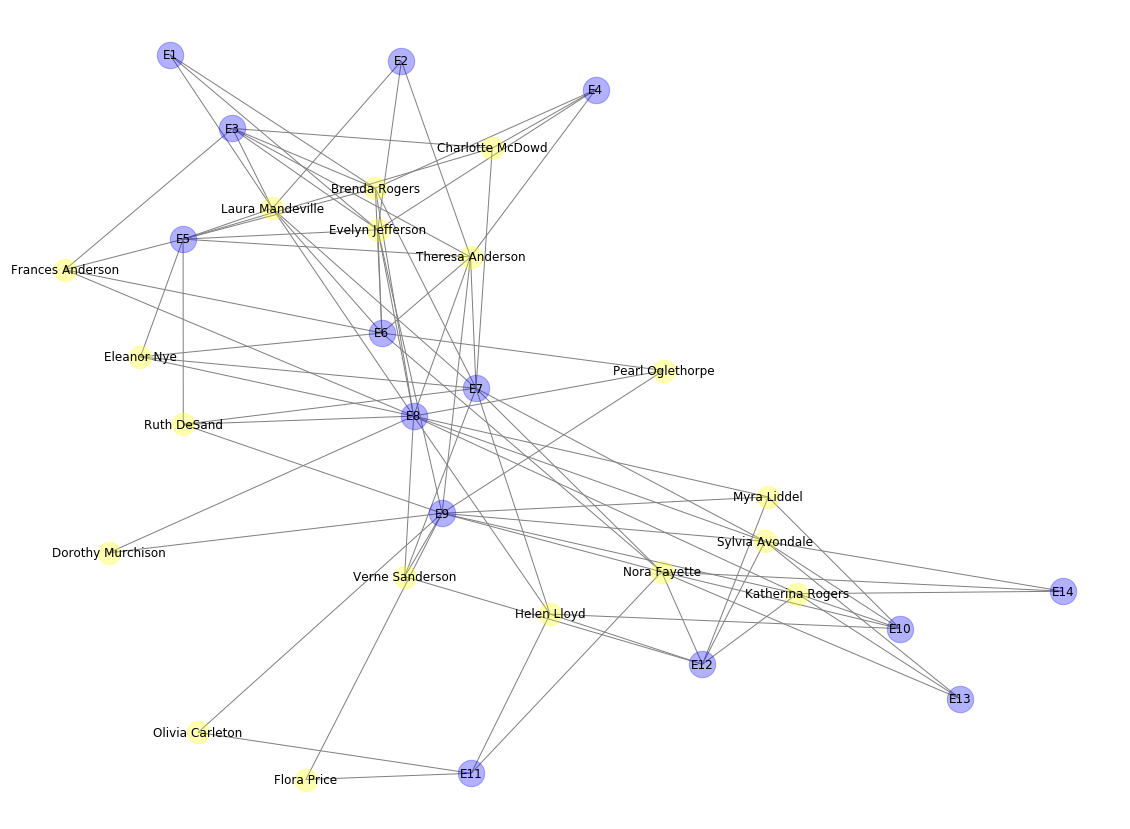

In [7]:
plt.figure(figsize=(20,15))
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist = women, node_color = 'yellow', alpha = 0.3, node_size = 500)
nx.draw_networkx_nodes(G, pos, nodelist = clubs, node_color = 'blue', alpha = 0.3, node_size = 700)
nx.draw_networkx_edges(G, pos, edge_color = 'gray')
nx.draw_networkx_labels(G, pos);

The graph visualization appears to show two different areas.  Clubs E7, E8, and E9 are in the middle of these areas, serving as the link between them.  

In the alternate version of the graph given below, we clearly see that clubs E7, E8, and E9 are attended by many of the women.  Some women attend quite a few clubs, while a few women hardly attend any clubs (Flora, Olivia, Dorothy).

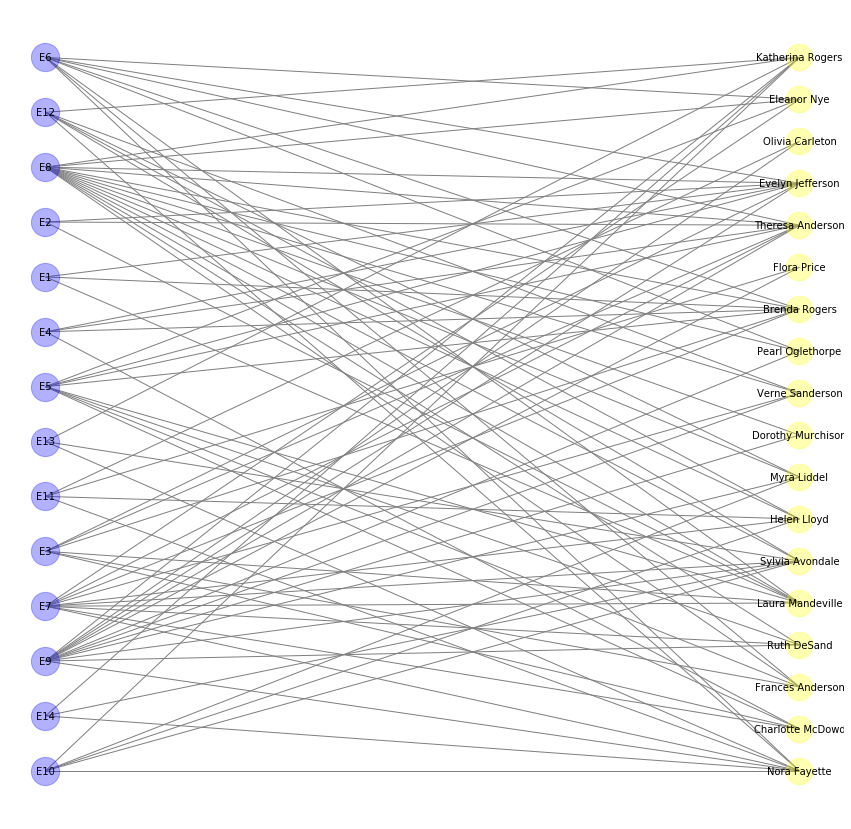

In [8]:
plt.figure(figsize=(15,15))
plt.axis('off')
pos=nx.drawing.layout.bipartite_layout(G, clubs)
nx.draw_networkx_nodes(G, pos, nodelist = women, node_color = 'yellow', alpha = 0.3, node_size = 700)
nx.draw_networkx_nodes(G, pos, nodelist = clubs, node_color = 'blue', alpha = 0.3, node_size = 800)
nx.draw_networkx_edges(G, pos, edge_color = 'gray')
nx.draw_networkx_labels(G, pos, font_size = 10);

### Women Degrees
The degrees for the women nodes is the number of clubs they attended.

In [9]:
w_deg = {k:v for k,v in dict(G.degree(women)).items()}
print('Women Degrees - Clubs Attended')
for woman, club in sorted([(x,y) 
              for x,y in w_deg.items()], 
              key=lambda x: x[1], reverse=True):
    print('{} -'.format(woman), 'Clubs:',club)

Women Degrees - Clubs Attended
Evelyn Jefferson - Clubs: 8
Theresa Anderson - Clubs: 8
Nora Fayette - Clubs: 8
Laura Mandeville - Clubs: 7
Brenda Rogers - Clubs: 7
Sylvia Avondale - Clubs: 7
Katherina Rogers - Clubs: 6
Helen Lloyd - Clubs: 5
Charlotte McDowd - Clubs: 4
Frances Anderson - Clubs: 4
Eleanor Nye - Clubs: 4
Ruth DeSand - Clubs: 4
Verne Sanderson - Clubs: 4
Myra Liddel - Clubs: 4
Pearl Oglethorpe - Clubs: 3
Dorothy Murchison - Clubs: 2
Olivia Carleton - Clubs: 2
Flora Price - Clubs: 2


### Clubs Degrees
The degrees for the club nodes is the number of women that attended that club.  Clubs E8, E9, and E7 are popular, but E1, E2, E13, and E14 are not.

In [10]:
c_deg = {k:v for k,v in dict(G.degree(clubs)).items()}
print('Club Degrees - Women Attended')
for club, degree in sorted([(x,y) 
                             for x,y in c_deg.items()], 
                             key=lambda x: x[1], reverse=True):
    print('{} -'.format(club), 'Women Attended:',degree)

Club Degrees - Women Attended
E8 - Women Attended: 14
E9 - Women Attended: 12
E7 - Women Attended: 10
E5 - Women Attended: 8
E6 - Women Attended: 8
E3 - Women Attended: 6
E12 - Women Attended: 6
E10 - Women Attended: 5
E4 - Women Attended: 4
E11 - Women Attended: 4
E1 - Women Attended: 3
E2 - Women Attended: 3
E13 - Women Attended: 3
E14 - Women Attended: 3


### Women Network Visualization

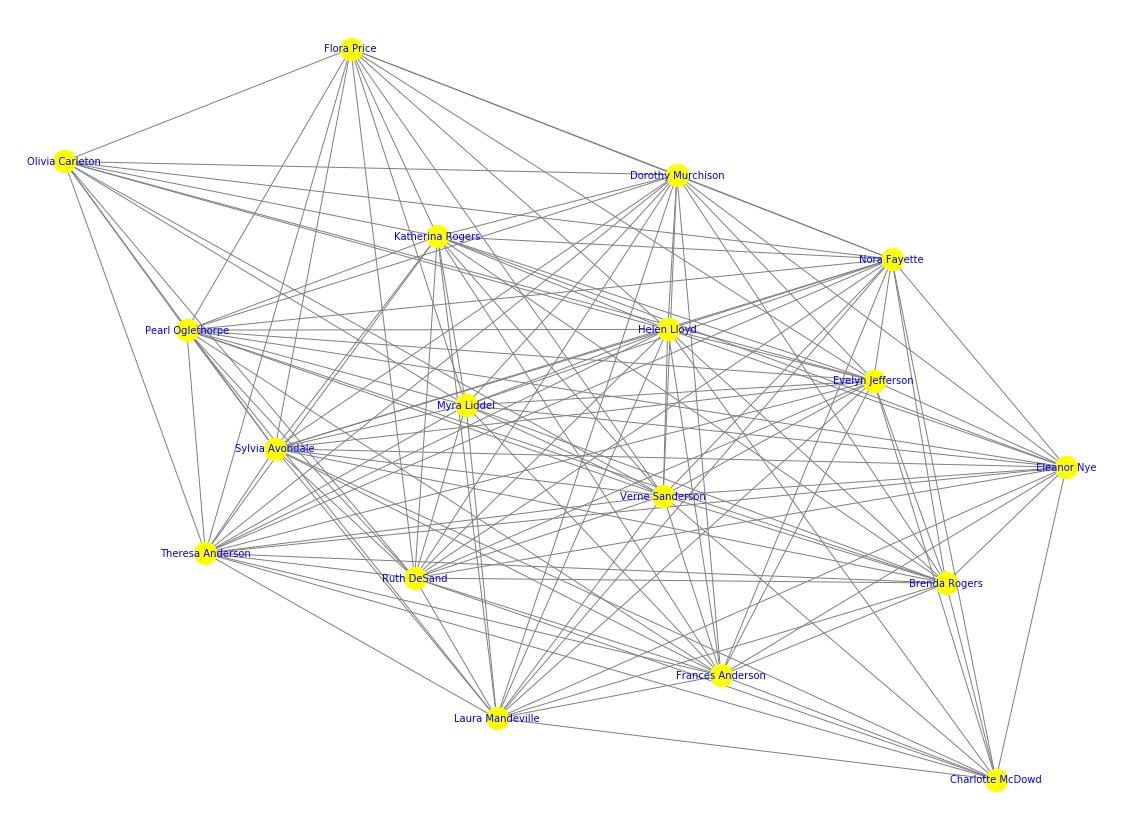

In [11]:
plt.figure(figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(W)
nx.draw_networkx_nodes(W, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(W, pos, edge_color = 'gray')
nx.draw_networkx_labels(W, pos, font_size=10, font_color ='blue')
plt.show()

It is hard to decipher any useful information from the visualization of the women network.  Using the weighted network might be more useful.

### Weighted Women Network Visualization

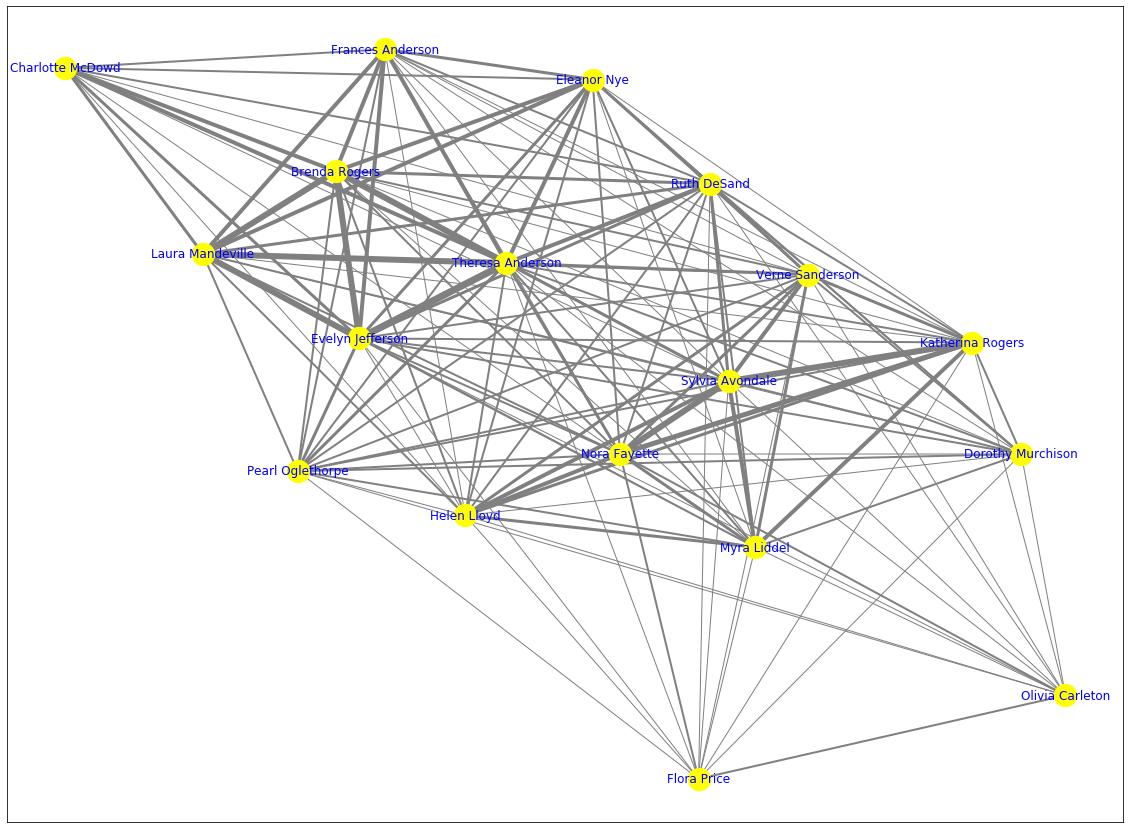

In [28]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(WW)
weights=[edata['weight'] for f,t,edata in WW.edges(data=True)]
nx.draw_networkx_nodes(WW, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(WW, pos, width=weights, edge_color='gray')
nx.draw_networkx_labels(WW, pos, font_size=12, font_color ='blue')

plt.show()

In this visualization of the women network, the graph edges are weighted and displayed with thickness according to their weight.  Thicker lines depict stronger relationships.  It looks like Katherine, Nora, and Sylvia have a close friendship, as does Theresa, Evelyn, Laura, and Brenda.  

### Women Network Degrees

In [13]:
ww_deg = {k:v for k,v in dict(WW.degree()).items()}
print('Women Network Degrees - Co-occurrences ')
for woman, wdegree in sorted([(x,y) 
              for x,y in ww_deg.items()], 
              key=lambda x: x[1], reverse=True):
    print('{} -'.format(woman), 'Weighted Degree:',wdegree)

Women Network Degrees - Co-occurrences 
Evelyn Jefferson - Weighted Degree: 17
Theresa Anderson - Weighted Degree: 17
Ruth DeSand - Weighted Degree: 17
Verne Sanderson - Weighted Degree: 17
Sylvia Avondale - Weighted Degree: 17
Nora Fayette - Weighted Degree: 17
Helen Lloyd - Weighted Degree: 17
Pearl Oglethorpe - Weighted Degree: 16
Myra Liddel - Weighted Degree: 16
Katherina Rogers - Weighted Degree: 16
Dorothy Murchison - Weighted Degree: 16
Laura Mandeville - Weighted Degree: 15
Brenda Rogers - Weighted Degree: 15
Frances Anderson - Weighted Degree: 15
Eleanor Nye - Weighted Degree: 15
Olivia Carleton - Weighted Degree: 12
Flora Price - Weighted Degree: 12
Charlotte McDowd - Weighted Degree: 11


Seven of the women have degree 17, that is, they have a co-occurrence with all of the other women (attended a club with each of the other women).

### Women Network Degree Centrality

In [14]:
ww_deg_cent = {k:v for k,v in dict(nx.degree_centrality(WW)).items()}
print('Women Network Degree Centrality ')
for woman, wdegree in sorted([(x,y) 
              for x,y in ww_deg_cent.items()], 
              key=lambda x: x[1], reverse=True):
    print('{} -'.format(woman), 'Degree Centrality:',round(wdegree,3))

Women Network Degree Centrality 
Evelyn Jefferson - Degree Centrality: 1.0
Theresa Anderson - Degree Centrality: 1.0
Ruth DeSand - Degree Centrality: 1.0
Verne Sanderson - Degree Centrality: 1.0
Sylvia Avondale - Degree Centrality: 1.0
Nora Fayette - Degree Centrality: 1.0
Helen Lloyd - Degree Centrality: 1.0
Pearl Oglethorpe - Degree Centrality: 0.941
Myra Liddel - Degree Centrality: 0.941
Katherina Rogers - Degree Centrality: 0.941
Dorothy Murchison - Degree Centrality: 0.941
Laura Mandeville - Degree Centrality: 0.882
Brenda Rogers - Degree Centrality: 0.882
Frances Anderson - Degree Centrality: 0.882
Eleanor Nye - Degree Centrality: 0.882
Olivia Carleton - Degree Centrality: 0.706
Flora Price - Degree Centrality: 0.706
Charlotte McDowd - Degree Centrality: 0.647


The 7 women with degree centrality equal to 1 are the women that attended a club that each of the other women also attended.

In [15]:
df_women = pd.DataFrame(list(nx.degree(W)),columns = ['Woman','Degrees']) 
df_women.sort_values(by='Degrees',
                     inplace=True,
                     ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(
              x = df_women['Woman'],
              y = df_women['Degrees']))

fig.update_layout(go.Layout(
    title='Number of Degrees (Connections with Other Women) for Each Woman',
    xaxis=dict(
        title='', tickangle = 90
    ),
    yaxis=dict(
        title='Degrees'
    )
))
fig.show()

### Women Network - Find Islands

This code will find islands, smaller sub graphs that are closely connected with edges above a specified threshold.  The code is from the textbook <u>Social Network Analysis for Startups</u> by Maksim Tsvetovat and Alexander Kouznetsov.

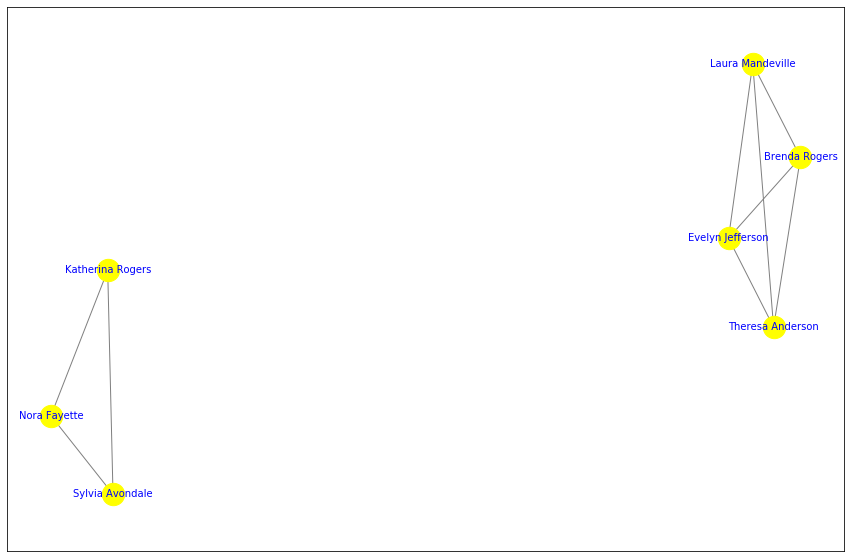

In [16]:
#Code from textbook Social Network Analysis for Startups by Maksim Tsvetovat and Alexander Kouznetsov
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

def island_method(g, iterations = 5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

cc = list(WW.subgraph(c) for c in nx.connected_components(WW))[0]
islands = island_method(cc)
    
# use 4 for the threshold
WW4 = trim_edges(WW, 4)

plt.figure(figsize=(15,10))
pos = nx.spring_layout(WW4)
nx.draw_networkx_nodes(WW4, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(WW4, pos,  edge_color='gray')
nx.draw_networkx_labels(WW4, pos, font_size=10, font_color ='blue')

plt.show()

Remember in the graph above, it appeared there were two groups of women with strong relationships.  The island analysis confirms that.  Different threshold values were considered, but using a threshold value of 4 seemed most appropriate.  We see the two sub-groups of women (Nora, Katherine, Sylvia) and (Brenda, Laura, Theresa, Evelyn).  These women tend to attend the same clubs.

### Women Network Cliques

In [17]:
for index, clique in enumerate(list(nx.find_cliques(WW))):
    print('Clique:',index+1)
    print('---------------------------------------------')
    for person in clique:
        print(person)
    print('')

Clique: 1
---------------------------------------------
Nora Fayette
Ruth DeSand
Sylvia Avondale
Verne Sanderson
Theresa Anderson
Evelyn Jefferson
Helen Lloyd
Myra Liddel
Dorothy Murchison
Pearl Oglethorpe
Katherina Rogers
Olivia Carleton
Flora Price

Clique: 2
---------------------------------------------
Nora Fayette
Ruth DeSand
Sylvia Avondale
Verne Sanderson
Theresa Anderson
Evelyn Jefferson
Helen Lloyd
Myra Liddel
Dorothy Murchison
Pearl Oglethorpe
Katherina Rogers
Laura Mandeville
Brenda Rogers
Frances Anderson
Eleanor Nye

Clique: 3
---------------------------------------------
Nora Fayette
Ruth DeSand
Sylvia Avondale
Verne Sanderson
Theresa Anderson
Evelyn Jefferson
Helen Lloyd
Charlotte McDowd
Frances Anderson
Brenda Rogers
Laura Mandeville
Eleanor Nye



Three cliques are found in the women network.  A clique is a group of women where everyone is connected directly to everyone else.  Remember that we had 3 clubs that were well attended by many of the women.

### Weighted Club Network Visualization

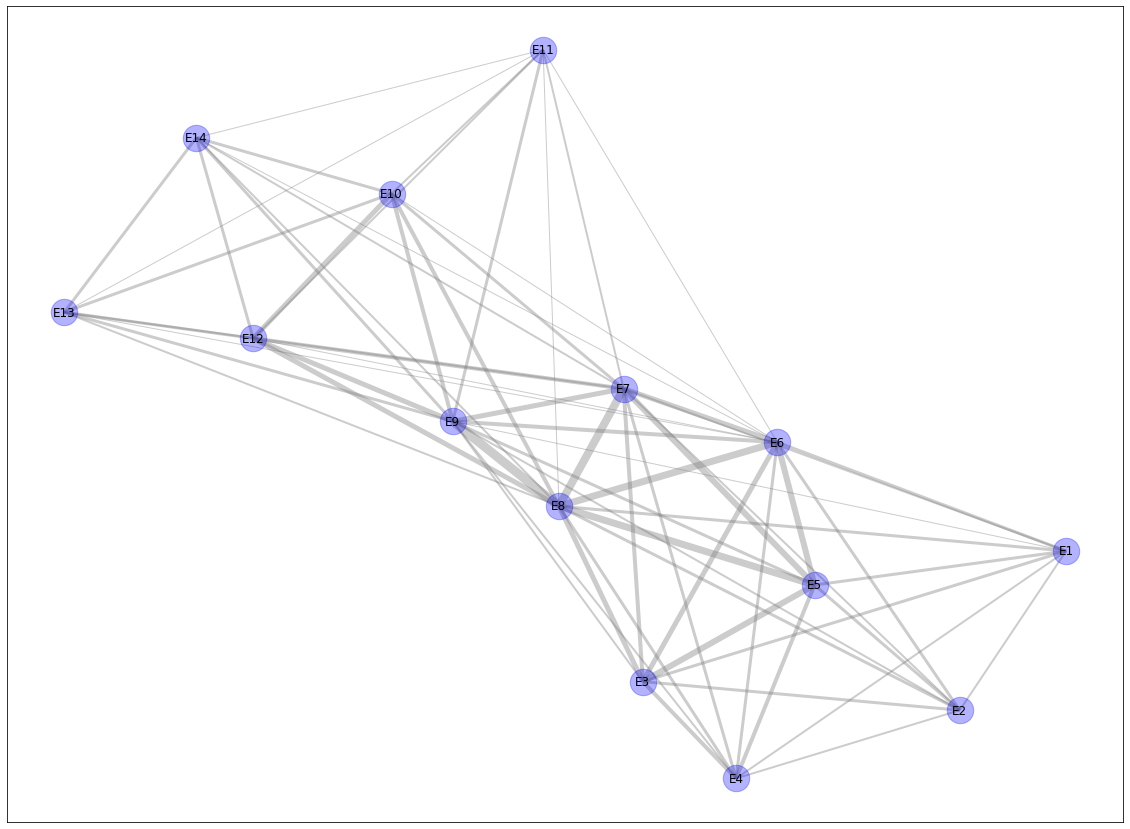

In [18]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(CW)
weights=[edata['weight'] for f,t,edata in CW.edges(data=True)]
nx.draw_networkx_nodes(CW, pos, node_color='blue', node_size=700, alpha=0.3)
nx.draw_networkx_edges(CW, pos, width=weights, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(CW, pos, font_size=12, font_color ='black')
plt.show()

The core group of clubs are E7, E8, and E9.  They are well attended.  Followed by E5 and E6.  

### Club Network - Find Islands

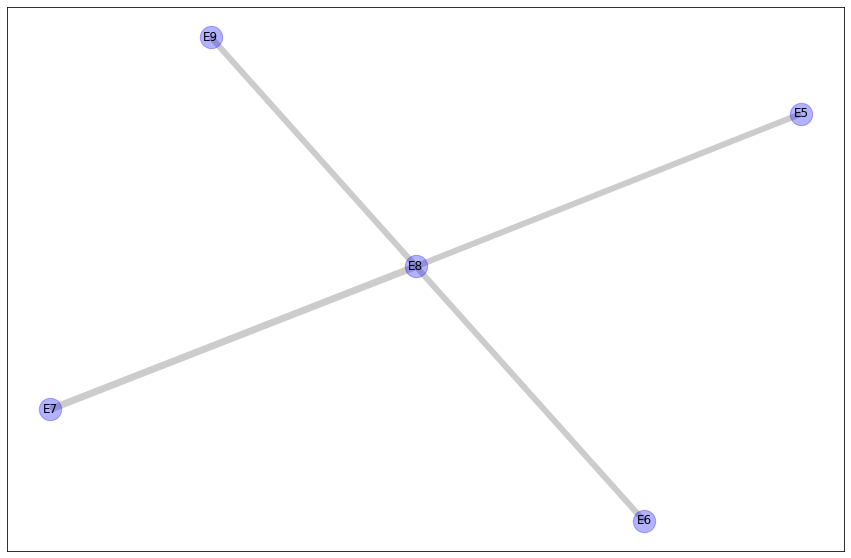

In [19]:
c_cc = list(CW.subgraph(c) for c in nx.connected_components(CW))[0]
c_islands = island_method(c_cc)
    
# use 6 for the threshold
CW6 = trim_edges(CW, 6)

plt.figure(figsize=(15,10))
pos = nx.spring_layout(CW6)
weights=[edata['weight'] for f,t,edata in WW4.edges(data=True)]
nx.draw_networkx_nodes(CW6, pos, node_color='blue', node_size=500, alpha=0.3)
nx.draw_networkx_edges(CW6, pos, width=weights, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(CW6, pos, font_size=12, font_color ='black')

plt.show()

Using 6 as the threshold (all edges below 6 are dropped), we see 5 clubs are left as the core clubs attended by many of the women (E5, E6, E7, E8, and E9).

### Conclusion

Analyzing the Davis Southern Women network, we found there are 2 core groups of women attending the same clubs.  This most likely signifies close friendships.  In addition there are 5 clubs that are attended by many of the women.